In [1]:
import os
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# Read csv file

In [2]:
DATA_PATH = '../크롤링/data/'
filepath = "한국 웹툰 해외반응.csv"
df = pd.read_csv(DATA_PATH+filepath)
df.head()

,videoId,Review
0,jfshnwZOE_U,한국 화이팅
1,0D6Uu_Vl0PE,플랫폼 ㅎㅎ
2,0D6Uu_Vl0PE,스마이스 씨의 마지막 말이 깊이 와닿네요. 젊은 여성들이 좋아하는 것들은 종종 모욕...
3,0D6Uu_Vl0PE,일본 디지털 만화시장의 성장은 의외네요. 영원히 변하지 않는 아날로그의 나라인줄 알...
4,0D6Uu_Vl0PE,한때 카카오가 유튜브 수익도 재쳤지만 카카오가 그 많은 돈을 벌어다 준 웹툰작가에 ...


In [3]:
df.tail()

,videoId,Review
3651,bbWu2jbjVBw,아...나혼랩 프로젝트가 제대로 되길 바랄뿐. 🙏 제발...
3652,bbWu2jbjVBw,진짜 저 퀄리티로 나오는거 맞나?;;; 그리고 설정에서 한국하고 일본을 바꿔버릴거 ...
3653,bbWu2jbjVBw,삼가 고인의 명복을 빕니다. ㅠㅠ
3654,bbWu2jbjVBw,안타깝게 만화 그리시던 작가님이 사망하셨다고 하네요. 나이도 37살밖에 안되는데도...
3655,bbWu2jbjVBw,진짜 거지같이ㅡ만들 생각 말고 제대로 만들어줘 영화화할거면 성진우는 차은우로 해주고


# Review를 문장단위의 리스트로 저장

In [4]:
review_list = df['Review'].values
review_list[:10]

array(['한국 화이팅', '플랫폼 ㅎㅎ',
       '스마이스 씨의 마지막 말이 깊이 와닿네요. 젊은 여성들이 좋아하는 것들은 종종 모욕을 당하거나 무시당한다라... 북미와 유럽에선 정말 오랜기간 10대 소녀들이 좋아하는 케이팝이 조롱과 멸시의 대상이었지요. 그러니 팬들도 이에 반발해 트위터등 소셜 미디어를 통해 온갖 편견에 열심히 맞서왔고요. 또 케이팝을 다루는 곳에 몰려가서 화력지원을 해주기도 했죠. 덕분에 React같은 채널에서 이미 6~7년 전부터 케이팝 리액션 비디오를 활발히 찍기 시작했던게 기억납니다. 해외팬들은 또 조롱에 맞서 Kpop in Public이란 운동을 주도하여 사람이 많은 공공장소에서 케이팝 댄스를 녹화하여 유튜브에 올리는 방식으로 홍보하기 시작했죠. 이렇게 팬들이 자신들이 좋아하는 것을 위해 대중의 조롱에 맞서 직접 행동에 나서줘서 참 고맙다는 생각이 듭니다. 덕분에 이젠 드디어 미국에서도 케이팝을 좋아한다고 해서 친구들의 조롱을 듣지 않아도 되는 시대가 온것 같습니다. 케이팝이 유튜브를 타고 조금씩 전파되기 시작한 2000년대 중후반 이후 거의 15년만에 이뤄낸 성과네요. 제가 영국에서 대학 다닐때만 해도 한국에서 왔다고 하면 다들 제가 무슨 거지나라에서 온것처럼 봤는데 적어도 이젠 그런 꼴은 안당해서 다행입니다.',
       '일본 디지털 만화시장의 성장은 의외네요. 영원히 변하지 않는 아날로그의 나라인줄 알았는데.',
       '한때 카카오가 유튜브 수익도 재쳤지만 카카오가 그 많은 돈을 벌어다 준 웹툰작가에 대한 처우를 잘했다고 보기 힘듭니다. 후퇴시켰으면 시켰죠. \n국뽕 거하게 마시러 온 분들에게 찬물 끼얹는 것 같아서 미안하지만... 카카오는 중국의 눈치를 보느라 중국의 심기를 거스르는 발언을 업로드하지 말라며  작가들의 당연한 권리를 박탈했죠...홍콩이나 위구르 독립을  지지하거나 그와 관련된 것들을 업로드하면 불이익이 있을 것이라고 했고...카카오측에서 사과문을 올리기야 했지만 작가들 사이에선 이것이 

# Convert "Review" to string and Save as a text file

In [5]:
df['Review'].values
document = ''.join(df['Review'].values)
print(document)

filepath = "한국 웹툰 해외반응.txt"
f = open(DATA_PATH + filepath, 'w')
f.write(document)
f.close()

한국 화이팅플랫폼 ㅎㅎ스마이스 씨의 마지막 말이 깊이 와닿네요. 젊은 여성들이 좋아하는 것들은 종종 모욕을 당하거나 무시당한다라... 북미와 유럽에선 정말 오랜기간 10대 소녀들이 좋아하는 케이팝이 조롱과 멸시의 대상이었지요. 그러니 팬들도 이에 반발해 트위터등 소셜 미디어를 통해 온갖 편견에 열심히 맞서왔고요. 또 케이팝을 다루는 곳에 몰려가서 화력지원을 해주기도 했죠. 덕분에 React같은 채널에서 이미 6~7년 전부터 케이팝 리액션 비디오를 활발히 찍기 시작했던게 기억납니다. 해외팬들은 또 조롱에 맞서 Kpop in Public이란 운동을 주도하여 사람이 많은 공공장소에서 케이팝 댄스를 녹화하여 유튜브에 올리는 방식으로 홍보하기 시작했죠. 이렇게 팬들이 자신들이 좋아하는 것을 위해 대중의 조롱에 맞서 직접 행동에 나서줘서 참 고맙다는 생각이 듭니다. 덕분에 이젠 드디어 미국에서도 케이팝을 좋아한다고 해서 친구들의 조롱을 듣지 않아도 되는 시대가 온것 같습니다. 케이팝이 유튜브를 타고 조금씩 전파되기 시작한 2000년대 중후반 이후 거의 15년만에 이뤄낸 성과네요. 제가 영국에서 대학 다닐때만 해도 한국에서 왔다고 하면 다들 제가 무슨 거지나라에서 온것처럼 봤는데 적어도 이젠 그런 꼴은 안당해서 다행입니다.일본 디지털 만화시장의 성장은 의외네요. 영원히 변하지 않는 아날로그의 나라인줄 알았는데.한때 카카오가 유튜브 수익도 재쳤지만 카카오가 그 많은 돈을 벌어다 준 웹툰작가에 대한 처우를 잘했다고 보기 힘듭니다. 후퇴시켰으면 시켰죠. 
국뽕 거하게 마시러 온 분들에게 찬물 끼얹는 것 같아서 미안하지만... 카카오는 중국의 눈치를 보느라 중국의 심기를 거스르는 발언을 업로드하지 말라며  작가들의 당연한 권리를 박탈했죠...홍콩이나 위구르 독립을  지지하거나 그와 관련된 것들을 업로드하면 불이익이 있을 것이라고 했고...카카오측에서 사과문을 올리기야 했지만 작가들 사이에선 이것이 석연치 않다는 의견이 대다수였죠. 웹툰의 수익성에 대해 좋은 면만 보고 단점을 보는

In [6]:
filepath = "한국 웹툰 해외반응.txt"
f = open(DATA_PATH + filepath, 'r')
document = f.read()
f.close()
print(document)

한국 화이팅플랫폼 ㅎㅎ스마이스 씨의 마지막 말이 깊이 와닿네요. 젊은 여성들이 좋아하는 것들은 종종 모욕을 당하거나 무시당한다라... 북미와 유럽에선 정말 오랜기간 10대 소녀들이 좋아하는 케이팝이 조롱과 멸시의 대상이었지요. 그러니 팬들도 이에 반발해 트위터등 소셜 미디어를 통해 온갖 편견에 열심히 맞서왔고요. 또 케이팝을 다루는 곳에 몰려가서 화력지원을 해주기도 했죠. 덕분에 React같은 채널에서 이미 6~7년 전부터 케이팝 리액션 비디오를 활발히 찍기 시작했던게 기억납니다. 해외팬들은 또 조롱에 맞서 Kpop in Public이란 운동을 주도하여 사람이 많은 공공장소에서 케이팝 댄스를 녹화하여 유튜브에 올리는 방식으로 홍보하기 시작했죠. 이렇게 팬들이 자신들이 좋아하는 것을 위해 대중의 조롱에 맞서 직접 행동에 나서줘서 참 고맙다는 생각이 듭니다. 덕분에 이젠 드디어 미국에서도 케이팝을 좋아한다고 해서 친구들의 조롱을 듣지 않아도 되는 시대가 온것 같습니다. 케이팝이 유튜브를 타고 조금씩 전파되기 시작한 2000년대 중후반 이후 거의 15년만에 이뤄낸 성과네요. 제가 영국에서 대학 다닐때만 해도 한국에서 왔다고 하면 다들 제가 무슨 거지나라에서 온것처럼 봤는데 적어도 이젠 그런 꼴은 안당해서 다행입니다.일본 디지털 만화시장의 성장은 의외네요. 영원히 변하지 않는 아날로그의 나라인줄 알았는데.한때 카카오가 유튜브 수익도 재쳤지만 카카오가 그 많은 돈을 벌어다 준 웹툰작가에 대한 처우를 잘했다고 보기 힘듭니다. 후퇴시켰으면 시켰죠. 
국뽕 거하게 마시러 온 분들에게 찬물 끼얹는 것 같아서 미안하지만... 카카오는 중국의 눈치를 보느라 중국의 심기를 거스르는 발언을 업로드하지 말라며  작가들의 당연한 권리를 박탈했죠...홍콩이나 위구르 독립을  지지하거나 그와 관련된 것들을 업로드하면 불이익이 있을 것이라고 했고...카카오측에서 사과문을 올리기야 했지만 작가들 사이에선 이것이 석연치 않다는 의견이 대다수였죠. 웹툰의 수익성에 대해 좋은 면만 보고 단점을 보는

# 한국어 전처리

# 1. 크롤링한 데이터이므로 HTML TAG 제거

In [7]:
document1 = BeautifulSoup(document, 'html.parser').get_text() # .text
print(document1[:1000])

한국 화이팅플랫폼 ㅎㅎ스마이스 씨의 마지막 말이 깊이 와닿네요. 젊은 여성들이 좋아하는 것들은 종종 모욕을 당하거나 무시당한다라... 북미와 유럽에선 정말 오랜기간 10대 소녀들이 좋아하는 케이팝이 조롱과 멸시의 대상이었지요. 그러니 팬들도 이에 반발해 트위터등 소셜 미디어를 통해 온갖 편견에 열심히 맞서왔고요. 또 케이팝을 다루는 곳에 몰려가서 화력지원을 해주기도 했죠. 덕분에 React같은 채널에서 이미 6~7년 전부터 케이팝 리액션 비디오를 활발히 찍기 시작했던게 기억납니다. 해외팬들은 또 조롱에 맞서 Kpop in Public이란 운동을 주도하여 사람이 많은 공공장소에서 케이팝 댄스를 녹화하여 유튜브에 올리는 방식으로 홍보하기 시작했죠. 이렇게 팬들이 자신들이 좋아하는 것을 위해 대중의 조롱에 맞서 직접 행동에 나서줘서 참 고맙다는 생각이 듭니다. 덕분에 이젠 드디어 미국에서도 케이팝을 좋아한다고 해서 친구들의 조롱을 듣지 않아도 되는 시대가 온것 같습니다. 케이팝이 유튜브를 타고 조금씩 전파되기 시작한 2000년대 중후반 이후 거의 15년만에 이뤄낸 성과네요. 제가 영국에서 대학 다닐때만 해도 한국에서 왔다고 하면 다들 제가 무슨 거지나라에서 온것처럼 봤는데 적어도 이젠 그런 꼴은 안당해서 다행입니다.일본 디지털 만화시장의 성장은 의외네요. 영원히 변하지 않는 아날로그의 나라인줄 알았는데.한때 카카오가 유튜브 수익도 재쳤지만 카카오가 그 많은 돈을 벌어다 준 웹툰작가에 대한 처우를 잘했다고 보기 힘듭니다. 후퇴시켰으면 시켰죠. 
국뽕 거하게 마시러 온 분들에게 찬물 끼얹는 것 같아서 미안하지만... 카카오는 중국의 눈치를 보느라 중국의 심기를 거스르는 발언을 업로드하지 말라며  작가들의 당연한 권리를 박탈했죠...홍콩이나 위구르 독립을  지지하거나 그와 관련된 것들을 업로드하면 불이익이 있을 것이라고 했고...카카오측에서 사과문을 올리기야 했지만 작가들 사이에선 이것이 석연치 않다는 의견이 대다수였죠. 웹툰의 수익성에 대해 좋은 면만 보고 단점을 보는

# 2. 한글만 추출( 구둣점, 이모티콘 자동 제거됨)

In [8]:
hangul = re.compile('[^ ㄱ-ㅣㅣ가-힣]+')
document2 = hangul.sub('', document1)
print(document2)

한국 화이팅플랫폼 ㅎㅎ스마이스 씨의 마지막 말이 깊이 와닿네요 젊은 여성들이 좋아하는 것들은 종종 모욕을 당하거나 무시당한다라 북미와 유럽에선 정말 오랜기간 대 소녀들이 좋아하는 케이팝이 조롱과 멸시의 대상이었지요 그러니 팬들도 이에 반발해 트위터등 소셜 미디어를 통해 온갖 편견에 열심히 맞서왔고요 또 케이팝을 다루는 곳에 몰려가서 화력지원을 해주기도 했죠 덕분에 같은 채널에서 이미 년 전부터 케이팝 리액션 비디오를 활발히 찍기 시작했던게 기억납니다 해외팬들은 또 조롱에 맞서   이란 운동을 주도하여 사람이 많은 공공장소에서 케이팝 댄스를 녹화하여 유튜브에 올리는 방식으로 홍보하기 시작했죠 이렇게 팬들이 자신들이 좋아하는 것을 위해 대중의 조롱에 맞서 직접 행동에 나서줘서 참 고맙다는 생각이 듭니다 덕분에 이젠 드디어 미국에서도 케이팝을 좋아한다고 해서 친구들의 조롱을 듣지 않아도 되는 시대가 온것 같습니다 케이팝이 유튜브를 타고 조금씩 전파되기 시작한 년대 중후반 이후 거의 년만에 이뤄낸 성과네요 제가 영국에서 대학 다닐때만 해도 한국에서 왔다고 하면 다들 제가 무슨 거지나라에서 온것처럼 봤는데 적어도 이젠 그런 꼴은 안당해서 다행입니다일본 디지털 만화시장의 성장은 의외네요 영원히 변하지 않는 아날로그의 나라인줄 알았는데한때 카카오가 유튜브 수익도 재쳤지만 카카오가 그 많은 돈을 벌어다 준 웹툰작가에 대한 처우를 잘했다고 보기 힘듭니다 후퇴시켰으면 시켰죠 국뽕 거하게 마시러 온 분들에게 찬물 끼얹는 것 같아서 미안하지만 카카오는 중국의 눈치를 보느라 중국의 심기를 거스르는 발언을 업로드하지 말라며  작가들의 당연한 권리를 박탈했죠홍콩이나 위구르 독립을  지지하거나 그와 관련된 것들을 업로드하면 불이익이 있을 것이라고 했고카카오측에서 사과문을 올리기야 했지만 작가들 사이에선 이것이 석연치 않다는 의견이 대다수였죠 웹툰의 수익성에 대해 좋은 면만 보고 단점을 보는 눈은 어두워지는 것을 막기 위해 이 글을 씁니다 그리고 불법사이트에서 웹툰을 보지 말아주세요 우리나

# 3. 구두점 삭제(불필요)

In [9]:
import unicodedata
import sys

# 구두점 문자로 이루어진 딕셔너리를 생성.
punctuation = dict.fromkeys( i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))

# for idx, i in enumerate(range(sys.maxunicode)):
#     if unicodedata.category(chr(i)).startswith('P'):
#         print(idx, chr(i))
        
# review_list1 = [string.translate(punctuation) for string in review_list]
# review_list1

document3 = document2.translate(punctuation)
document3

'한국 화이팅플랫폼 ㅎㅎ스마이스 씨의 마지막 말이 깊이 와닿네요 젊은 여성들이 좋아하는 것들은 종종 모욕을 당하거나 무시당한다라 북미와 유럽에선 정말 오랜기간 대 소녀들이 좋아하는 케이팝이 조롱과 멸시의 대상이었지요 그러니 팬들도 이에 반발해 트위터등 소셜 미디어를 통해 온갖 편견에 열심히 맞서왔고요 또 케이팝을 다루는 곳에 몰려가서 화력지원을 해주기도 했죠 덕분에 같은 채널에서 이미 년 전부터 케이팝 리액션 비디오를 활발히 찍기 시작했던게 기억납니다 해외팬들은 또 조롱에 맞서   이란 운동을 주도하여 사람이 많은 공공장소에서 케이팝 댄스를 녹화하여 유튜브에 올리는 방식으로 홍보하기 시작했죠 이렇게 팬들이 자신들이 좋아하는 것을 위해 대중의 조롱에 맞서 직접 행동에 나서줘서 참 고맙다는 생각이 듭니다 덕분에 이젠 드디어 미국에서도 케이팝을 좋아한다고 해서 친구들의 조롱을 듣지 않아도 되는 시대가 온것 같습니다 케이팝이 유튜브를 타고 조금씩 전파되기 시작한 년대 중후반 이후 거의 년만에 이뤄낸 성과네요 제가 영국에서 대학 다닐때만 해도 한국에서 왔다고 하면 다들 제가 무슨 거지나라에서 온것처럼 봤는데 적어도 이젠 그런 꼴은 안당해서 다행입니다일본 디지털 만화시장의 성장은 의외네요 영원히 변하지 않는 아날로그의 나라인줄 알았는데한때 카카오가 유튜브 수익도 재쳤지만 카카오가 그 많은 돈을 벌어다 준 웹툰작가에 대한 처우를 잘했다고 보기 힘듭니다 후퇴시켰으면 시켰죠 국뽕 거하게 마시러 온 분들에게 찬물 끼얹는 것 같아서 미안하지만 카카오는 중국의 눈치를 보느라 중국의 심기를 거스르는 발언을 업로드하지 말라며  작가들의 당연한 권리를 박탈했죠홍콩이나 위구르 독립을  지지하거나 그와 관련된 것들을 업로드하면 불이익이 있을 것이라고 했고카카오측에서 사과문을 올리기야 했지만 작가들 사이에선 이것이 석연치 않다는 의견이 대다수였죠 웹툰의 수익성에 대해 좋은 면만 보고 단점을 보는 눈은 어두워지는 것을 막기 위해 이 글을 씁니다 그리고 불법사이트에서 웹툰을 보지 말아주세요 우리

# 4. 이모티콘 삭제(불필요)

In [10]:
from soynlp.normalizer import *

document4 = emoticon_normalize(document3, num_repeats=2)
document4

'한국 화이팅플랫폼 ㅎㅎ마이스 씨의 마지막 말이 깊이 와닿네요 젊은 여성들이 좋아하는 것들은 종종 모욕을 당하거나 무시당한다라 북미와 유럽에선 정말 오랜기간 대 소녀들이 좋아하는 케이팝이 조롱과 멸시의 대상이었지요 그러니 팬들도 이에 반발해 트위터등 소셜 미디어를 통해 온갖 편견에 열심히 맞서왔고요 또 케이팝을 다루는 곳에 몰려가서 화력지원을 해주기도 했죠 덕분에 같은 채널에서 이미 년 전부터 케이팝 리액션 비디오를 활발히 찍기 시작했던게 기억납니다 해외팬들은 또 조롱에 맞서 이란 운동을 주도하여 사람이 많은 공공장소에서 케이팝 댄스를 녹화하여 유튜브에 올리는 방식으로 홍보하기 시작했죠 이렇게 팬들이 자신들이 좋아하는 것을 위해 대중의 조롱에 맞서 직접 행동에 나서줘서 참 고맙다는 생각이 듭니다 덕분에 이젠 드디어 미국에서도 케이팝을 좋아한다고 해서 친구들의 조롱을 듣지 않아도 되는 시대가 온것 같습니다 케이팝이 유튜브를 타고 조금씩 전파되기 시작한 년대 중후반 이후 거의 년만에 이뤄낸 성과네요 제가 영국에서 대학 다닐때만 해도 한국에서 왔다고 하면 다들 제가 무슨 거지나라에서 온것처럼 봤는데 적어도 이젠 그런 꼴은 안당해서 다행입니다일본 디지털 만화시장의 성장은 의외네요 영원히 변하지 않는 아날로그의 나라인줄 알았는데한때 카카오가 유튜브 수익도 재쳤지만 카카오가 그 많은 돈을 벌어다 준 웹툰작가에 대한 처우를 잘했다고 보기 힘듭니다 후퇴시켰으면 시켰죠 국뽕 거하게 마시러 온 분들에게 찬물 끼얹는 것 같아서 미안하지만 카카오는 중국의 눈치를 보느라 중국의 심기를 거스르는 발언을 업로드하지 말라며 작가들의 당연한 권리를 박탈했죠홍콩이나 위구르 독립을 지지하거나 그와 관련된 것들을 업로드하면 불이익이 있을 것이라고 했고카카오측에서 사과문을 올리기야 했지만 작가들 사이에선 이것이 석연치 않다는 의견이 대다수였죠 웹툰의 수익성에 대해 좋은 면만 보고 단점을 보는 눈은 어두워지는 것을 막기 위해 이 글을 씁니다 그리고 불법사이트에서 웹툰을 보지 말아주세요 우리나라의 자

# 5. 반복어 삭제(ㅋㅋ)

In [11]:
from soynlp.normalizer import *
document5 = repeat_normalize(document4, num_repeats=2)
document5

'한국 화이팅플랫폼 ㅎㅎ마이스 씨의 마지막 말이 깊이 와닿네요 젊은 여성들이 좋아하는 것들은 종종 모욕을 당하거나 무시당한다라 북미와 유럽에선 정말 오랜기간 대 소녀들이 좋아하는 케이팝이 조롱과 멸시의 대상이었지요 그러니 팬들도 이에 반발해 트위터등 소셜 미디어를 통해 온갖 편견에 열심히 맞서왔고요 또 케이팝을 다루는 곳에 몰려가서 화력지원을 해주기도 했죠 덕분에 같은 채널에서 이미 년 전부터 케이팝 리액션 비디오를 활발히 찍기 시작했던게 기억납니다 해외팬들은 또 조롱에 맞서 이란 운동을 주도하여 사람이 많은 공공장소에서 케이팝 댄스를 녹화하여 유튜브에 올리는 방식으로 홍보하기 시작했죠 이렇게 팬들이 자신들이 좋아하는 것을 위해 대중의 조롱에 맞서 직접 행동에 나서줘서 참 고맙다는 생각이 듭니다 덕분에 이젠 드디어 미국에서도 케이팝을 좋아한다고 해서 친구들의 조롱을 듣지 않아도 되는 시대가 온것 같습니다 케이팝이 유튜브를 타고 조금씩 전파되기 시작한 년대 중후반 이후 거의 년만에 이뤄낸 성과네요 제가 영국에서 대학 다닐때만 해도 한국에서 왔다고 하면 다들 제가 무슨 거지나라에서 온것처럼 봤는데 적어도 이젠 그런 꼴은 안당해서 다행입니다일본 디지털 만화시장의 성장은 의외네요 영원히 변하지 않는 아날로그의 나라인줄 알았는데한때 카카오가 유튜브 수익도 재쳤지만 카카오가 그 많은 돈을 벌어다 준 웹툰작가에 대한 처우를 잘했다고 보기 힘듭니다 후퇴시켰으면 시켰죠 국뽕 거하게 마시러 온 분들에게 찬물 끼얹는 것 같아서 미안하지만 카카오는 중국의 눈치를 보느라 중국의 심기를 거스르는 발언을 업로드하지 말라며 작가들의 당연한 권리를 박탈했죠홍콩이나 위구르 독립을 지지하거나 그와 관련된 것들을 업로드하면 불이익이 있을 것이라고 했고카카오측에서 사과문을 올리기야 했지만 작가들 사이에선 이것이 석연치 않다는 의견이 대다수였죠 웹툰의 수익성에 대해 좋은 면만 보고 단점을 보는 눈은 어두워지는 것을 막기 위해 이 글을 씁니다 그리고 불법사이트에서 웹툰을 보지 말아주세요 우리나라의 자

In [12]:
# 맞춤법 교정
# from hanspell import spell_checker

# spelled_sent = spell_checker.check(document5) #  # 길이가 길어서 동작 안 함!!!!!!
# document6 = spelled_sent.checked 
# document6

# 6. Okt를 이용하여 토큰화

In [13]:
from konlpy.tag import Okt
okt = Okt()
word_tokens = okt.morphs(document5)
word_tokens

['한국',
 '화이팅',
 '플랫폼',
 'ㅎㅎ',
 '마이스',
 '씨',
 '의',
 '마지막',
 '말',
 '이',
 '깊이',
 '와',
 '닿네요',
 '젊은',
 '여성',
 '들',
 '이',
 '좋아하는',
 '것',
 '들',
 '은',
 '종종',
 '모욕',
 '을',
 '당하거나',
 '무시',
 '당',
 '한',
 '다라',
 '북미',
 '와',
 '유럽',
 '에선',
 '정말',
 '오랜',
 '기간',
 '대',
 '소녀',
 '들',
 '이',
 '좋아하는',
 '케이팝',
 '이',
 '조롱',
 '과',
 '멸시',
 '의',
 '대상',
 '이었지요',
 '그러니',
 '팬',
 '들',
 '도',
 '이',
 '에',
 '반발',
 '해',
 '트위터',
 '등',
 '소셜',
 '미디어',
 '를',
 '통해',
 '온갖',
 '편견',
 '에',
 '열심히',
 '맞서',
 '왔고요',
 '또',
 '케이팝',
 '을',
 '다루는',
 '곳',
 '에',
 '몰려가서',
 '화',
 '력',
 '지원',
 '을',
 '해주기도',
 '했죠',
 '덕분',
 '에',
 '같은',
 '채널',
 '에서',
 '이미',
 '년',
 '전',
 '부터',
 '케이팝',
 '리액션',
 '비디오',
 '를',
 '활발히',
 '찍기',
 '시작',
 '했던게',
 '기억납니다',
 '해외',
 '팬',
 '들',
 '은',
 '또',
 '조롱',
 '에',
 '맞서',
 '이란',
 '운동',
 '을',
 '주도하여',
 '사람',
 '이',
 '많은',
 '공공장소',
 '에서',
 '케이팝',
 '댄스',
 '를',
 '녹화',
 '하여',
 '유튜브',
 '에',
 '올리는',
 '방식',
 '으로',
 '홍보',
 '하기',
 '시작',
 '했죠',
 '이렇게',
 '팬',
 '들',
 '이',
 '자신',
 '들',
 '이',
 '좋아하는',
 '것',
 '을',
 '위해',
 '대중',
 '의',
 '조롱',

# 7. 한국어 불용어 제거

In [14]:
"""
한국어 불용어 리스트 : https://www.ranks.nl/stopwords/korean / https://bab2min.tistory.com/544
"""
from konlpy.tag import Okt
okt = Okt()

# 한국어 불용어 파일 읽어와서 stop_words 리스트 만들기
with open("./불용어 사전 파일/ranksnl-korean.txt", "r") as f:
    stop_words = set()
    for line in f:
        #print(line.split()[0])
        stop_words.add(line.split()[0])
        pass
#stop_words

# 한국어 불용어 제거
result = [word for word in word_tokens if not word in stop_words]
print(result[:100])

['한국', '화이팅', '플랫폼', 'ㅎㅎ', '마이스', '씨', '마지막', '말', '깊이', '닿네요', '젊은', '여성', '좋아하는', '은', '종종', '모욕', '당하거나', '무시', '당', '다라', '북미', '유럽', '에선', '정말', '오랜', '기간', '대', '소녀', '좋아하는', '케이팝', '조롱', '멸시', '대상', '이었지요', '팬', '도', '반발', '해', '트위터', '소셜', '미디어', '통해', '온갖', '편견', '열심히', '맞서', '왔고요', '케이팝', '다루는', '곳', '몰려가서', '화', '력', '지원', '해주기도', '했죠', '덕분', '채널', '이미', '전', '케이팝', '리액션', '비디오', '활발히', '찍기', '시작', '했던게', '기억납니다', '해외', '팬', '은', '조롱', '맞서', '이란', '운동', '주도하여', '사람', '많은', '공공장소', '케이팝', '댄스', '녹화', '하여', '유튜브', '올리는', '방식', '홍보', '시작', '했죠', '팬', '좋아하는', '위해', '대중', '조롱', '맞서', '직접', '행동', '나서줘서', '고맙다는', '생각']


In [164]:
# 한국어불용어100.txt

# # stop_words 리스트 만들기
# with open("한국어불용어100.txt", "r") as f:
#     stop_words = set()
#     for line in f:
#         #print(line.split()[0])
#         stop_words.add(line.split()[0])
#         pass
# # stop_words
# result = [word for word in word_tokens if not word in stop_words]
# # print(result)

# 8. 빈도 분석

In [15]:
from collections import Counter

wordInfo = Counter(result) #  단어별 빈도수 처리, 딕셔너리 타입으로 반환
#print(wordInfo)

# 한글로 워드클라우드 시각화
# from wordcloud import WordCloud
# wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
# gen = wc.generate_from_frequencies(wordInfo)
# plt.figure()
# plt.imshow(gen)
# wc.to_file("불용어 처리후.png")

cnt = Counter(result)
vocab_sorted = sorted(cnt.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted[:100])

[('은', 805), ('도', 738), ('중국', 737), ('웹툰', 645), ('한국', 639), ('는', 537), ('판권', 425), ('일본', 385), ('원작', 355), ('다', 297), ('거', 288), ('만화', 279), ('고', 223), ('적', 221), ('작가', 206), ('지', 195), ('진짜', 195), ('못', 187), ('게', 186), ('영화', 181), ('뭐', 178), ('우리나라', 170), ('나라', 168), ('사람', 161), ('돈', 158), ('애니', 152), ('더', 145), ('문화', 143), ('말', 134), ('잘', 133), ('작품', 131), ('화', 128), ('시장', 127), ('생각', 121), ('이라고', 118), ('문', 116), ('면', 112), ('임', 106), ('걸', 103), ('라고', 103), ('이나', 101), ('보고', 99), ('유', 98), ('해서', 93), ('보다', 92), ('님', 91), ('보면', 90), ('니', 90), ('개', 89), ('많이', 86), ('국', 86), ('본', 85), ('내', 85), ('이라', 84), ('꺼', 83), ('수', 82), ('국뽕', 81), ('중', 81), ('정도', 80), ('드라마', 79), ('조석', 78), ('일본만화', 78), ('놈', 76), ('요', 75), ('세계', 75), ('ㅋ', 75), ('해', 74), ('인기', 73), ('사서', 73), ('문제', 73), ('있는', 72), ('좀비', 72), ('서', 71), ('뉴스', 71), ('지금', 70), ('표절', 70), ('냐', 69), ('작', 67), ('없는', 67), ('이네', 65), ('처럼', 64), ('디즈니', 64), ('이지

# 9. 글자수 2이상인 단어만 추출후,   wordcloud 이용한 빈도 순위 보여주기

['중국', '웹툰', '한국', '판권', '일본', '원작', '만화', '작가', '진짜', '영화', '우리나라', '나라', '사람', '애니', '문화', '작품', '시장', '생각', '이라고', '라고', '이나', '보고', '해서', '보다', '보면', '많이', '이라', '국뽕', '정도', '드라마', '조석', '일본만화', '세계', '인기', '사서', '문제', '있는', '좀비', '뉴스', '지금', '표절', '없는', '이네', '처럼', '디즈니', '이지', '역시', '불법', '소설', '중공', '이고', '국가', '수준', '이제', '중국인', '자체', '소리', '그림', '게임', '제작', '표기', '때문', '주고', '미국', '입니다', '포스터', '이라도', '아직', '표시', '다행', 'ㅎㅎ', '정말', '좋은', '라는', '빨리', '저작권', '정부', '스토리', '컨텐츠', '요즘', '원피스', '해야', '만화가', '에는', '인거', '리메이크', '홍보', '합니다', '제발', '애니메이션', '도둑', '제대로', '나혼렙', '이건', '수입', '이란', '되는', '아니고', '국민', '영상', '대한민국', '에도', '귀신', '댓글', '계속', '굳이', '봐도', '대국', '절대', '거지', '수익', '대부분', '전세계', '하는데', '사실', '정식', '샀으면', '예전', '해도', '이라는', '인들', '짝퉁', '인가', '이름', '했는데', '비교', '있음', '가지', '발전', '들이', '솔직히', '남자', '속국', '외국', '언론', '그나마', '소국', '악행', '플랫폼', '보는', '한다', '이유', '이미', '에서도', '사이트', '부분', '쓰레기', '아님', '인정', '내용', '흥행', '모든', '얘기', '한국인', '없고', '산업', '아니라', '원조', '만화책', '많은

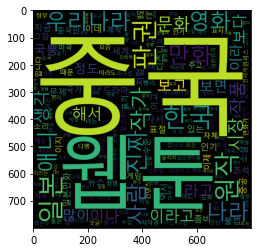

In [16]:
word_to_index = {}
index_to_word = {}

# 글자수 2이상인 단어만 추출 
for idx, (word, frequency) in enumerate(vocab_sorted) :
    if frequency < 2:
        continue
        
    if len(word) < 2: # 길이가 1이면 제외
        continue
    word_to_index[word] = idx +1
    index_to_word[idx+1] = word
print(list(word_to_index.keys())[:300])


cnt = Counter(list(word_to_index.keys())[:300])
# 한글로 워드클라우드 시각화
from wordcloud import WordCloud
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(cnt)
plt.figure()
plt.imshow(gen)
wc.to_file("두 단어 이상만.png")

data = ' '.join(list(word_to_index.keys())[:300])

DATA_PATH = './data/'
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)    
    
# file_path = './data/자연어처리후_{filepath}_.txt'.format(filepath=filepath)
# f = open(file_path, 'w')
# f.write(data)
# f.close()
# print("\nSave Done.")